# [문제 - 1] 

In [22]:
import requests
from bs4 import BeautifulSoup

URL = "https://search.naver.com/search.naver?query=날씨"
res = requests.get(URL)
soup = BeautifulSoup(res.text, 'lxml')

location = soup.find('div', attrs = {'class':'title_area _area_panel'}).find('h2', attrs = {'class':'title'}).text
temp = soup.find('div', attrs = {'class':'temperature_text'}).text[6:]
weather = soup.find('span', attrs = {'class':'weather before_slash'}).text
lowest = soup.find('span', attrs = {'class':'lowest'}).text[4:]
highest = soup.find('span', attrs = {'class':'highest'}).text[4:]
dust = soup.find('span', attrs = {'class':'txt'}).text

import datetime


while True:
    print('==============================')
    print('날씨 확인 프로그램')
    print('==============================')
    print('접속 시간: ',datetime.datetime.now())
    print('접속 위치: ',location)
    print('------------------------------') # 이 부분까지 함수로 만들어서 사용
    print('1. 현재 날씨 및 온도 확인')
    print('2. 최저/최고 온도 확인')
    print('3. 미세먼지 확인')
    print('0. 종료')
    print('------------------------------')
    menu_num = input('번호를 입력하세요: ')
    if menu_num =='1':
        print('==============================')
        print('현재 날씨 확인')
        print('==============================')
        print(weather,'/',temp)
    elif menu_num == '2':
        print('==============================')
        print('최저/최고 기온 확인')
        print('==============================')
        print('최저 기온: ',lowest)
        print('최고 기온: ',highest)
    elif menu_num == '3':
        print('==============================')
        print('미세먼지 확인')
        print('==============================')
        print('미세먼지: ',dust)
    elif menu_num == '0':
        print('프로그램을 종료합니다.')
        break
    else:
        print('메뉴 번호 오류!')

날씨 확인 프로그램
접속 시간:  2024-04-08 11:02:52.804075
접속 위치:  강남구 삼성1동
------------------------------
1. 현재 날씨 및 온도 확인
2. 최저/최고 온도 확인
3. 미세먼지 확인
0. 종료
------------------------------


번호를 입력하세요:  0


프로그램을 종료합니다.


# [문제 - 2]

In [26]:
import os
import time
import requests
from bs4 import BeautifulSoup

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver import Chrome, ChromeOptions
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

driver = Chrome(service=Service(ChromeDriverManager().install()), options=ChromeOptions())
driver.get('https://www.naver.com')
ele = driver.find_element(by=By.ID, value='query')
ele.send_keys('bts')
ele.send_keys(Keys.ENTER)
driver.find_element(By.LINK_TEXT, '이미지').click()
time.sleep(4)

# 클릭 전에 사진을 먼저 가져와서 읽기
bts_imgs = driver.find_elements(By.CSS_SELECTOR, '#main_pack > section.sc_new.sp_nimage._fe_image_viewer_prepend_target > div.api_subject_bx._fe_image_tab_list_root.ani_fadein > div > div > div.image_tile._fe_image_tab_grid > div > div > div > div')

cnt = 0
img_dir = './bts_img/'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
    print('폴더 생성')
else:
    print('폴더가 존재함')

for img in bts_imgs:
    img.click()
    original_img = driver.find_element(By.CLASS_NAME, '_fe_image_viewer_image_fallback_target').get_attribute('src')
    if not original_img.startswith('http'): continue
    cnt += 1

    img_contents = requests.get(original_img)
    with open(img_dir+f'bts_{cnt:02d}.jpg', 'wb') as f:
        print(original_img)
        f.write(img_contents.content)

    if cnt >= 10: break
print('BTS 사진 저장 완료')

폴더 생성
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2F0e%2F76%2F04%2F0e76048d4120fbb5e9d2f12c1fdfc5c6.jpg&type=sc960_832
https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzA3MTNfMTcg%2FMDAxNjg5MTgxNzY1OTYy.L12zL7MbdLWv5UdwfDOduFvyPHk6uOH6baOMVQLDUewg.KD-dkM8F5s5j-64ADDcJCABK32h4QRQTuRFA3fbYuaog.JPEG.awoocom7%2FBTS_%2527We%2527_BTS1-4.jpg&type=sc960_832
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fdimg.donga.com%2Fwps%2FNEWS%2FIMAGE%2F2022%2F12%2F20%2F117077571.1.jpg&type=sc960_832
https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F020%2F2023%2F02%2F11%2F0003479072_001_20230211030147673.jpg&type=sc960_832
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2F8e%2F82%2Fcd%2F8e82cd8b649d0bbf52dd9cfeb68dd415.jpg&type=sc960_832
https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzA3MTdfMTg0%2FMDAxNjg5NTkxNDA3NDkw.4TIRRCUlNql5zvNlxmlYnbyF6zIRA5Xi84IjApa6yE

# [문제 - 3]

In [39]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.melon.com/new/index.htm'
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36 Edg/122.0.0.0'}
res = requests.get(URL, headers=headers)
soup = BeautifulSoup(res.text, 'lxml')
song_list = soup.select('#frm > div > table > tbody > tr')

print(f"{'순위':3s}{'곡명':30s}{'가수':30s}{'앨범':30s}")
for rank, song in enumerate(song_list, 1):
    song_info = song.find_all('div', attrs = {'class':'wrap_song_info'}) # find_all을 하면 list로 넘어옴
    title = song_info[0].find('div', attrs = {'class':'ellipsis rank01'}).find('a').text # 첫번째 wrap_song_info
    singer = song_info[0].find('div', attrs = {'class':'ellipsis rank02'}).find('span').text
    album = song_info[1].find('div', attrs = {'class':'ellipsis rank03'}).find('a').text # 두번째 wrap_song_info
    print(f'{rank:02d}{title:30s}{singer:30s}{album:30s}')
    if rank >= 10: break

순위 곡명                            가수                            앨범                            
01혹시 세상에 혼자 남겨진 것 같다면           우디 (Woody)                    When You Alone                
02일기                            김나영                           눈물의 여왕 OST Part.7             
03헤어지면 생각나는 노래                  브로맨스 (VROMANCE)               헤어지면 생각나는 노래                  
04안아줄래                          임세준                           rest                          
05부디                            전건호, 이예은                      부디                            
06내 사랑은 여기 다 썼으니                숙희                            내 사랑은 여기 다 썼으니                
07단                             노을                            단                             
08Forever with you              더 라스트 배너맨(THE LAST BANNER MAN)Forever with you              
09아는 여자                         유성은                           아는 여자                         
10Kiss                          이준형                           Kiss Al

# [문제 - 4]

In [40]:
import re
s = 'Edit the Expression & Text to see matches. Roll over matches or the expression for details. PCRE & JavaScript flavors of RegEx are supported. Validate your expression with Tests mode.'
m = re.findall('[A-Z]\w+', s)
print(m)

['Edit', 'Expression', 'Text', 'Roll', 'PCRE', 'JavaScript', 'RegEx', 'Validate', 'Tests']


# [문제 - 6]

In [45]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False

data = {
'영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
'개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
'관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
'평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}

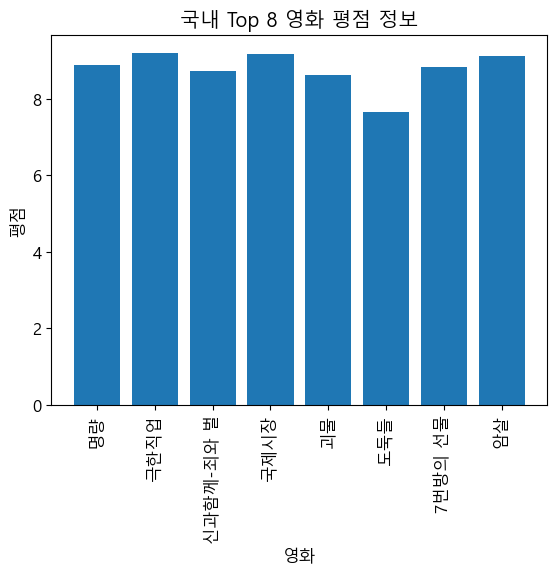

In [46]:
plt.bar(data['영화'], data['평점'])
plt.title('국내 Top 8 영화 평점 정보')
plt.xlabel('영화')
plt.ylabel('평점')
plt.xticks(rotation = 90)
plt.show()

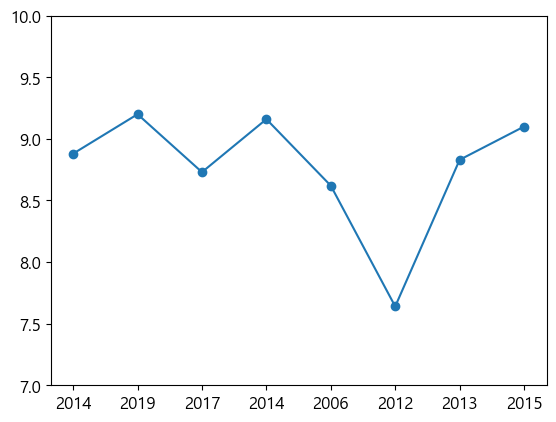

In [51]:
import numpy as np
plt.plot(np.arange(len(data['평점'])), data['평점'], marker = 'o')
plt.xticks(np.arange(len(data['평점'])), data['개봉 연도'])
plt.ylim(7, 10)
plt.show()

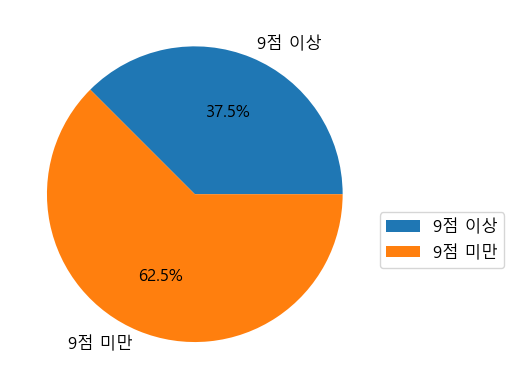

In [52]:
over_9 = list(filter(lambda x:x >= 9, data['평점'])) # 평점 데이터 중 9점 이상인 값을 리스트로
under_9 = list(filter(lambda x:x < 9, data['평점']))

values = [len(over_9), len(under_9)]
labels = ['9점 이상', '9점 미만']
plt.pie(values, labels=labels, autopct = '%.1f%%')
plt.legend(loc = (1, 0.3))
plt.show()